In [2]:
import pandas as pd
# from sunpy.coordinates.transformations import hgs_to_hcc
# from sunpy.coordinates import frames
import sunpy.coordinates
from astropy.coordinates import SkyCoord
from math import isnan
import astropy.units as u
import numpy as np
import matplotlib.pylab as plt


In [3]:
data = pd.read_csv("data.csv", parse_dates=["T_REC"])
data.head()
data.dropna(axis=0, subset=["LAT_FWT", "LON_FWT"])
data.tail()

,HARPNUM,T_REC,NOAA_AR,LAT_FWT,LON_FWT,AREA_ACR,USFLUX,MEANGAM,MEANGBT,MEANGBZ,...,any_flare_in_6h,X_flare_in_12h,M_flare_in_12h,any_flare_in_12h,X_flare_in_24h,M_flare_in_24h,any_flare_in_24h,X_flare_in_48h,M_flare_in_48h,any_flare_in_48h
297580,7262,2018-06-05 17:00:00,12712,15.035259,85.838554,62.998547,3.078118e+21,24.810,44.169,45.471,...,0,0,0,0,0,0,0,0,0,0
297581,7262,2018-06-05 18:00:00,12712,14.840383,85.763130,55.839046,1.839231e+21,27.483,67.640,94.496,...,0,0,0,0,0,0,0,0,0,0
297582,7262,2018-06-05 19:00:00,12712,14.665590,85.891327,34.200356,9.030728e+20,20.323,39.208,40.013,...,0,0,0,0,0,0,0,0,0,0
297583,7262,2018-06-05 20:00:00,12712,14.421501,86.053177,20.116899,1.315946e+20,30.132,59.768,87.357,...,0,0,0,0,0,0,0,0,0,0
297584,7262,2018-06-05 21:00:00,12712,14.257753,86.351898,26.819269,0.000000e+00,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.loc[data["LON_FWT"] > 90]
print(data["LAT_FWT"].min(skipna=True))
print(data["LAT_FWT"].max(skipna=True))
data["T_REC"].iloc[2]

-38.308777
43.373882


Timestamp('2010-05-05 05:00:00')

In [5]:
# for each day, get a list of lat for each harpnum
start_day = data.loc[0, "T_REC"].strftime("%Y-%m-%d")
end_day = data.loc[data.shape[0]-1, "T_REC"].strftime("%Y-%m-%d")
print(end_day)
print(start_day)
print("---")

lat_list = []
lon_list = []
total = 0
for d in pd.date_range(start_day, end_day):
    day_data = data.loc[data["T_REC"] == d]
#     print("{}: {} values".format(d, len(day_data["LAT_FWT"].values)))
    lat_list.append(day_data["LAT_FWT"].values)
    lon_list.append(day_data["LON_FWT"].values)
    total += len(day_data["LAT_FWT"].values)
#     print(lat_list)
#     print(lon_list)
#     print("-----")

    #     print(data.loc[data["T_REC"] == d, "T_REC"])

2018-06-05
2010-05-05
---


In [6]:
print(len(lat_list))
print(total)

2954
12362


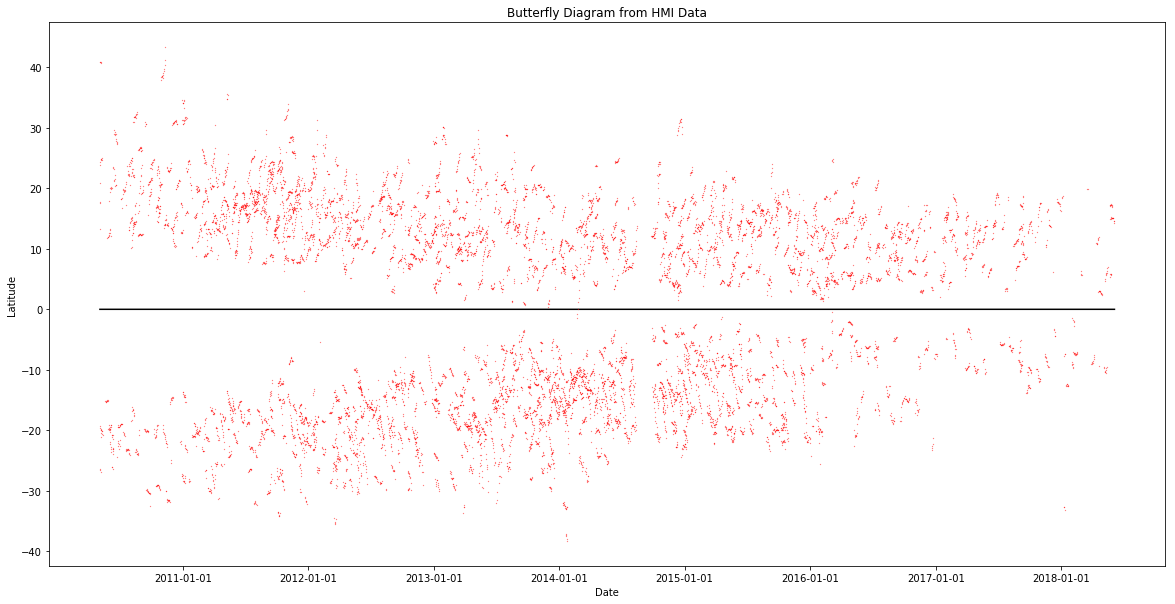

In [31]:
date_labels = [d.strftime("%Y-%m-%d") for d in pd.date_range(start_day, end_day)]
# labels = [d.strftime("%Y-%m-%d") for m in pd.date_range(start_day, end_day, freq="M")]
x = range(len(date_labels))

locations = [i for i in range(len(date_labels)) if date_labels[i][5:] == "01-01"]

plt.figure(figsize=[20,10])
ticklocs = []

plt.plot(x, [0 for i in range(len(x))], 'black')

plt.xticks(locations, [date_labels[i] for i in range(len(date_labels)) if i in locations])

plt.title("Butterfly Diagram from HMI Data")
plt.xlabel("Date")
plt.ylabel("Latitude")

for ind, lat_vals in enumerate(lat_list):
    for l in lat_vals:
        plt.plot(x[ind], l, 'ro', ms=0.2)
    

In [ ]:
print(ticklocs)